# Wilshire Liu

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>



In this Problem Set we will solve the Unsupervised problem using k-means clustering algorithm. 

## Task 1
Read the wine data from the link provided below. 
Split the wind data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in  clusters of 3? 

The referece plot is given below. 

In [25]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)


In [26]:
df_wine_y = df_wine[0]
df_wine_features = df_wine.copy().drop(0, axis=1)


In [27]:
# Standardize the features
scaler = StandardScaler()
df_wine_features_sd = scaler.fit_transform(df_wine_features)
df_wine_features_sd = pd.DataFrame(df_wine_features_sd)

# PCA
pca = PCA(n_components=2)
pca.fit(df_wine_features_sd)
PCA_df_wine_features_sd = pca.transform(df_wine_features_sd)
#PCA_df_wine_features_sd = pd.DataFrame(PCA_df_wine_features_sd)
#PCA_df_wine_features_sd.head(10)

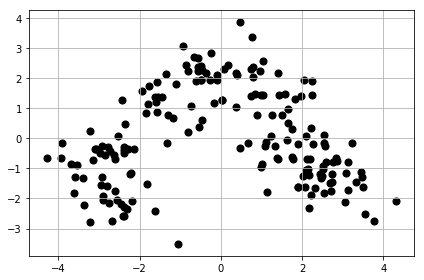

In [28]:
plt.scatter(PCA_df_wine_features_sd[:,0], PCA_df_wine_features_sd[:,1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

Data points appear in clusters of 3.

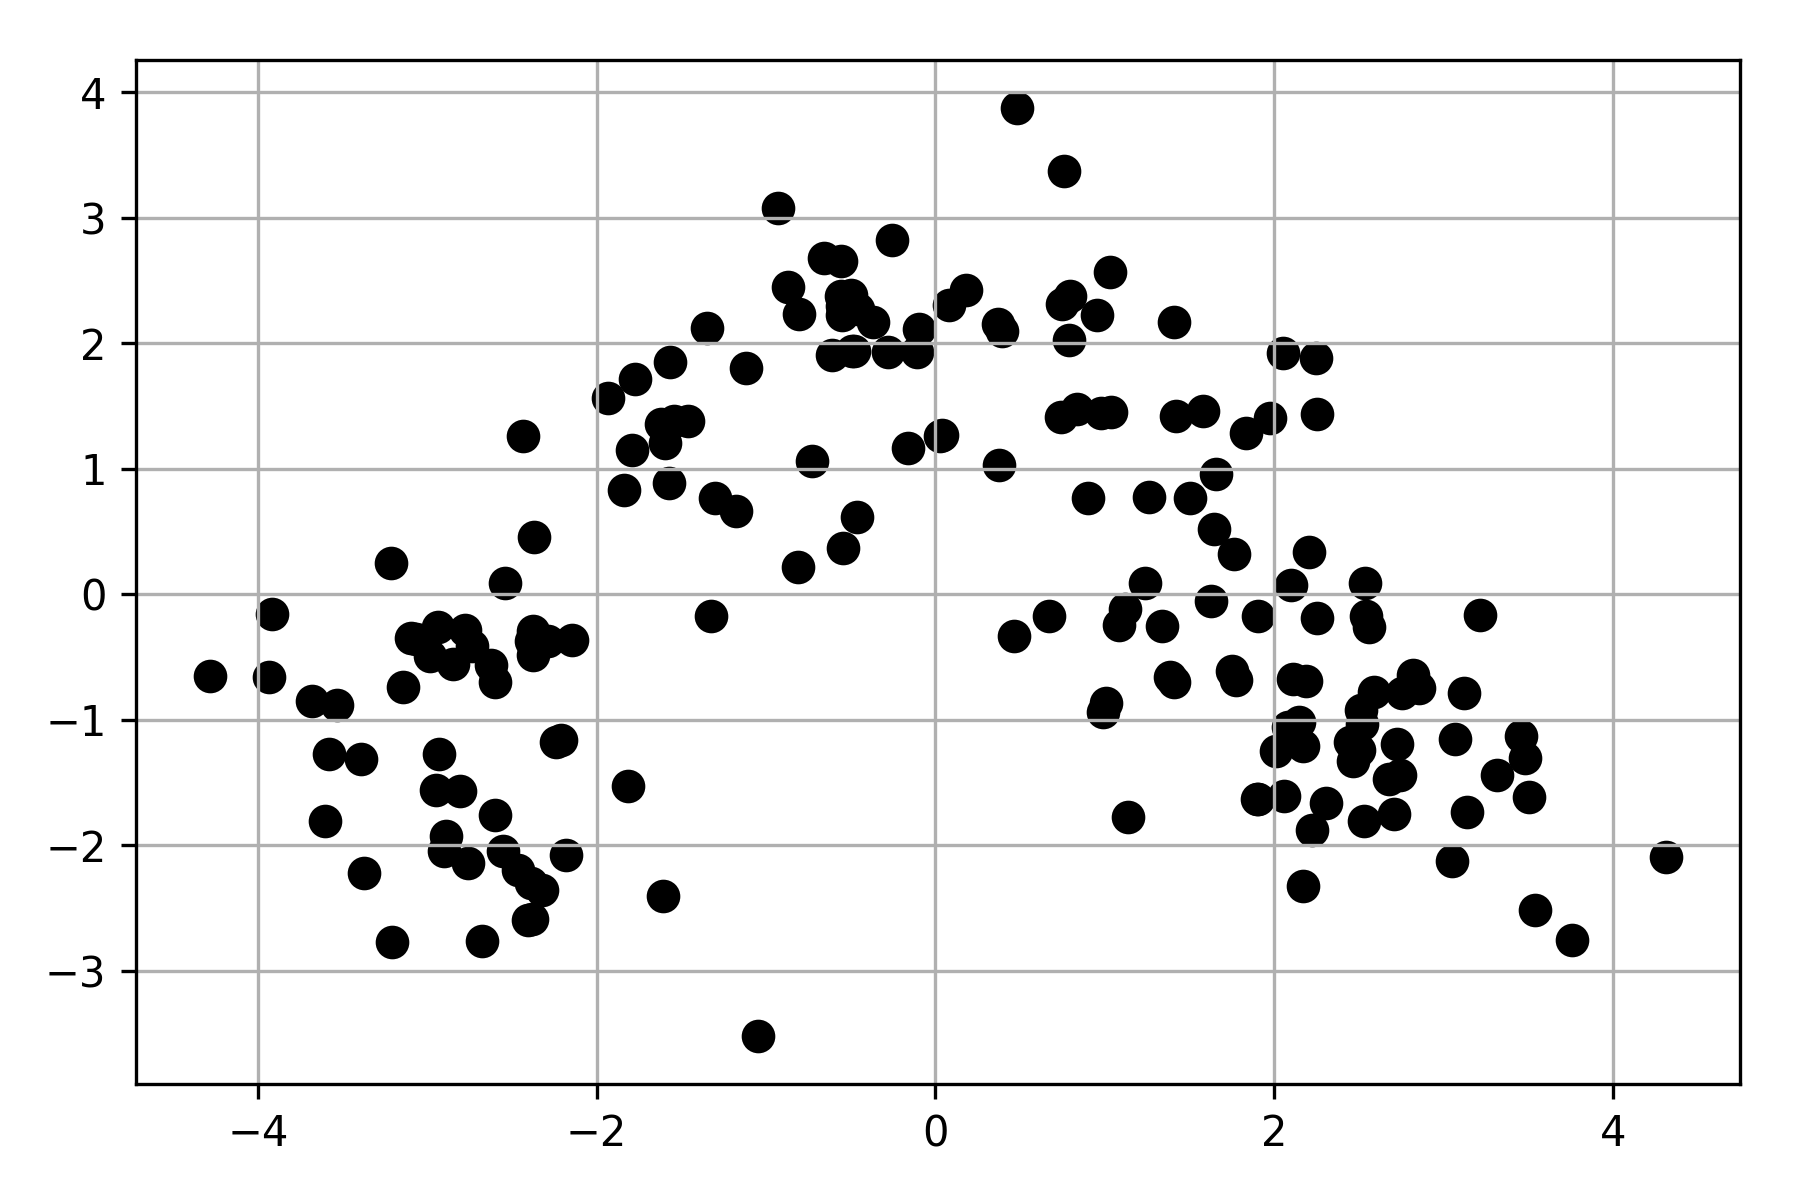

In [29]:
from IPython.display import Image
Image(filename=r'Blobs.png')

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Makesure to match the predicted wine class to the original wine class and then print the accuracy. 


Reference plot is given below: 

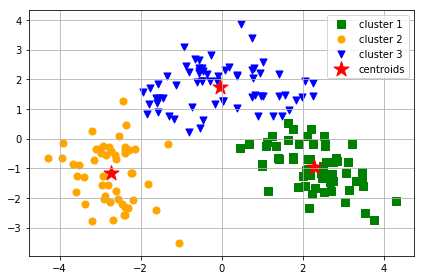

In [30]:
km = KMeans(n_clusters=3, # how many clusters
            init='random', # try 'k-means++' instead of 'random'
            n_init=10,    # 10 runs of the k-means algorithm, each run starts with a different
                          # set of 3 centroids; choose the one that has the lowest SSE
            max_iter=300, # each run is capped at 300 iterations OR
            tol=1e-04,    # tolerance of 0.0001 is reached 
            random_state=0)

y_km = km.fit_predict(PCA_df_wine_features_sd)

plt.scatter(PCA_df_wine_features_sd[y_km == 0, 0],
            PCA_df_wine_features_sd[y_km == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')

plt.scatter(PCA_df_wine_features_sd[y_km == 1, 0],
            PCA_df_wine_features_sd[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(PCA_df_wine_features_sd[y_km == 2, 0],
            PCA_df_wine_features_sd[y_km == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('centroids.png', dpi=300)
plt.show()

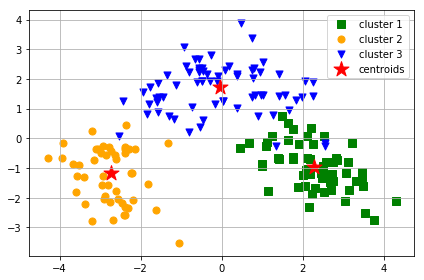

In [31]:
plt.scatter(PCA_df_wine_features_sd[df_wine_y == 1, 0],
            PCA_df_wine_features_sd[df_wine_y == 1, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')

plt.scatter(PCA_df_wine_features_sd[df_wine_y == 3, 0],
            PCA_df_wine_features_sd[df_wine_y == 3, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(PCA_df_wine_features_sd[df_wine_y == 2, 0],
            PCA_df_wine_features_sd[df_wine_y == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('centroids.png', dpi=300)
plt.show()

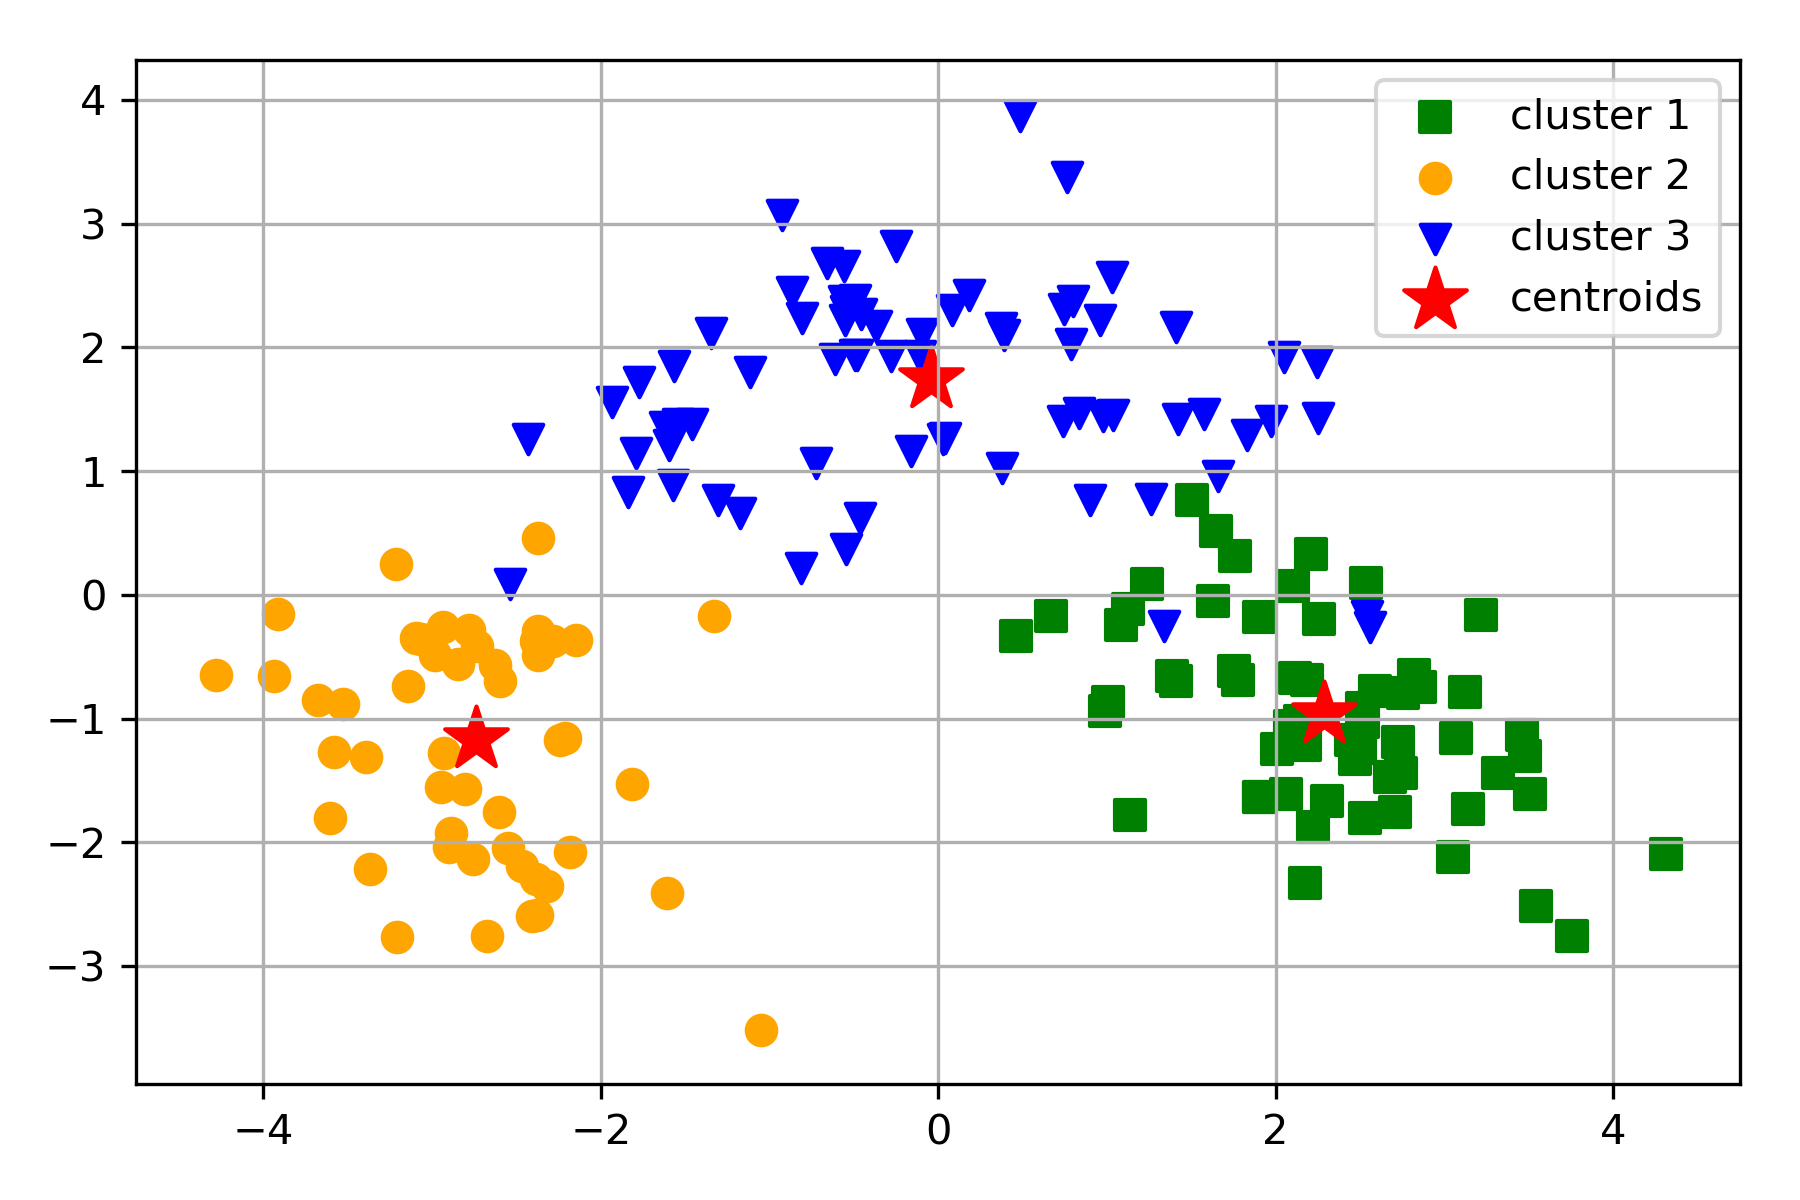

In [32]:
Image(filename=r'centroids.png')

In [33]:
# Confusion matrix
for i in range(len(y_km)):
    if y_km[i] == 0:
        y_km[i] = 1
    elif y_km[i] == 1:
        y_km[i] = 3
        
#print(np.asarray(df_wine_y))
#print(y_km)

print('Misclassified samples in test set: %d' %(df_wine_y != y_km).sum())
print('Accuracy: %.2f' % accuracy_score(df_wine_y, y_km))

print('Confusion Matrix:')
print(confusion_matrix(df_wine_y, y_km))
print(classification_report(df_wine_y, y_km))

Misclassified samples in test set: 6
Accuracy: 0.97
Confusion Matrix:
[[58  1  0]
 [ 3 66  2]
 [ 0  0 48]]
              precision    recall  f1-score   support

           1       0.95      0.98      0.97        59
           2       0.99      0.93      0.96        71
           3       0.96      1.00      0.98        48

   micro avg       0.97      0.97      0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



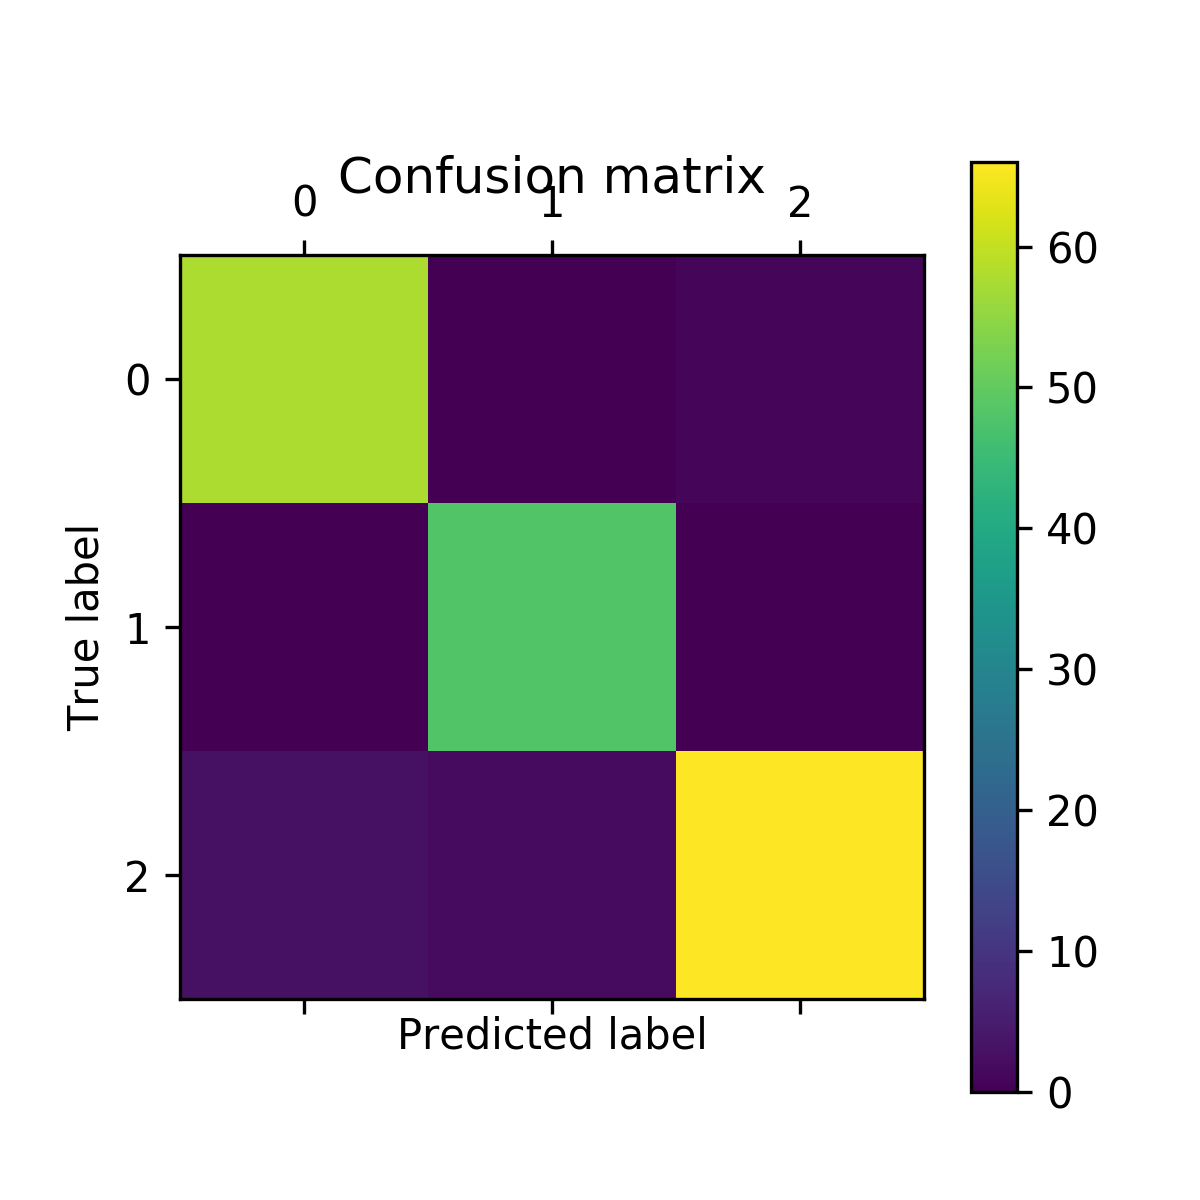

In [34]:
Image(filename=r'confusion.png')

## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

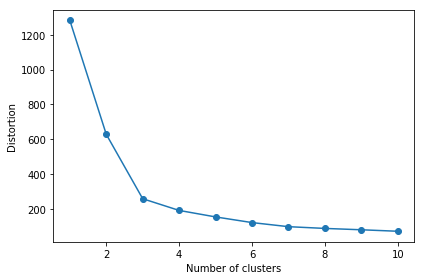

In [35]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(PCA_df_wine_features_sd)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('elbow.png', dpi=300)
plt.show()

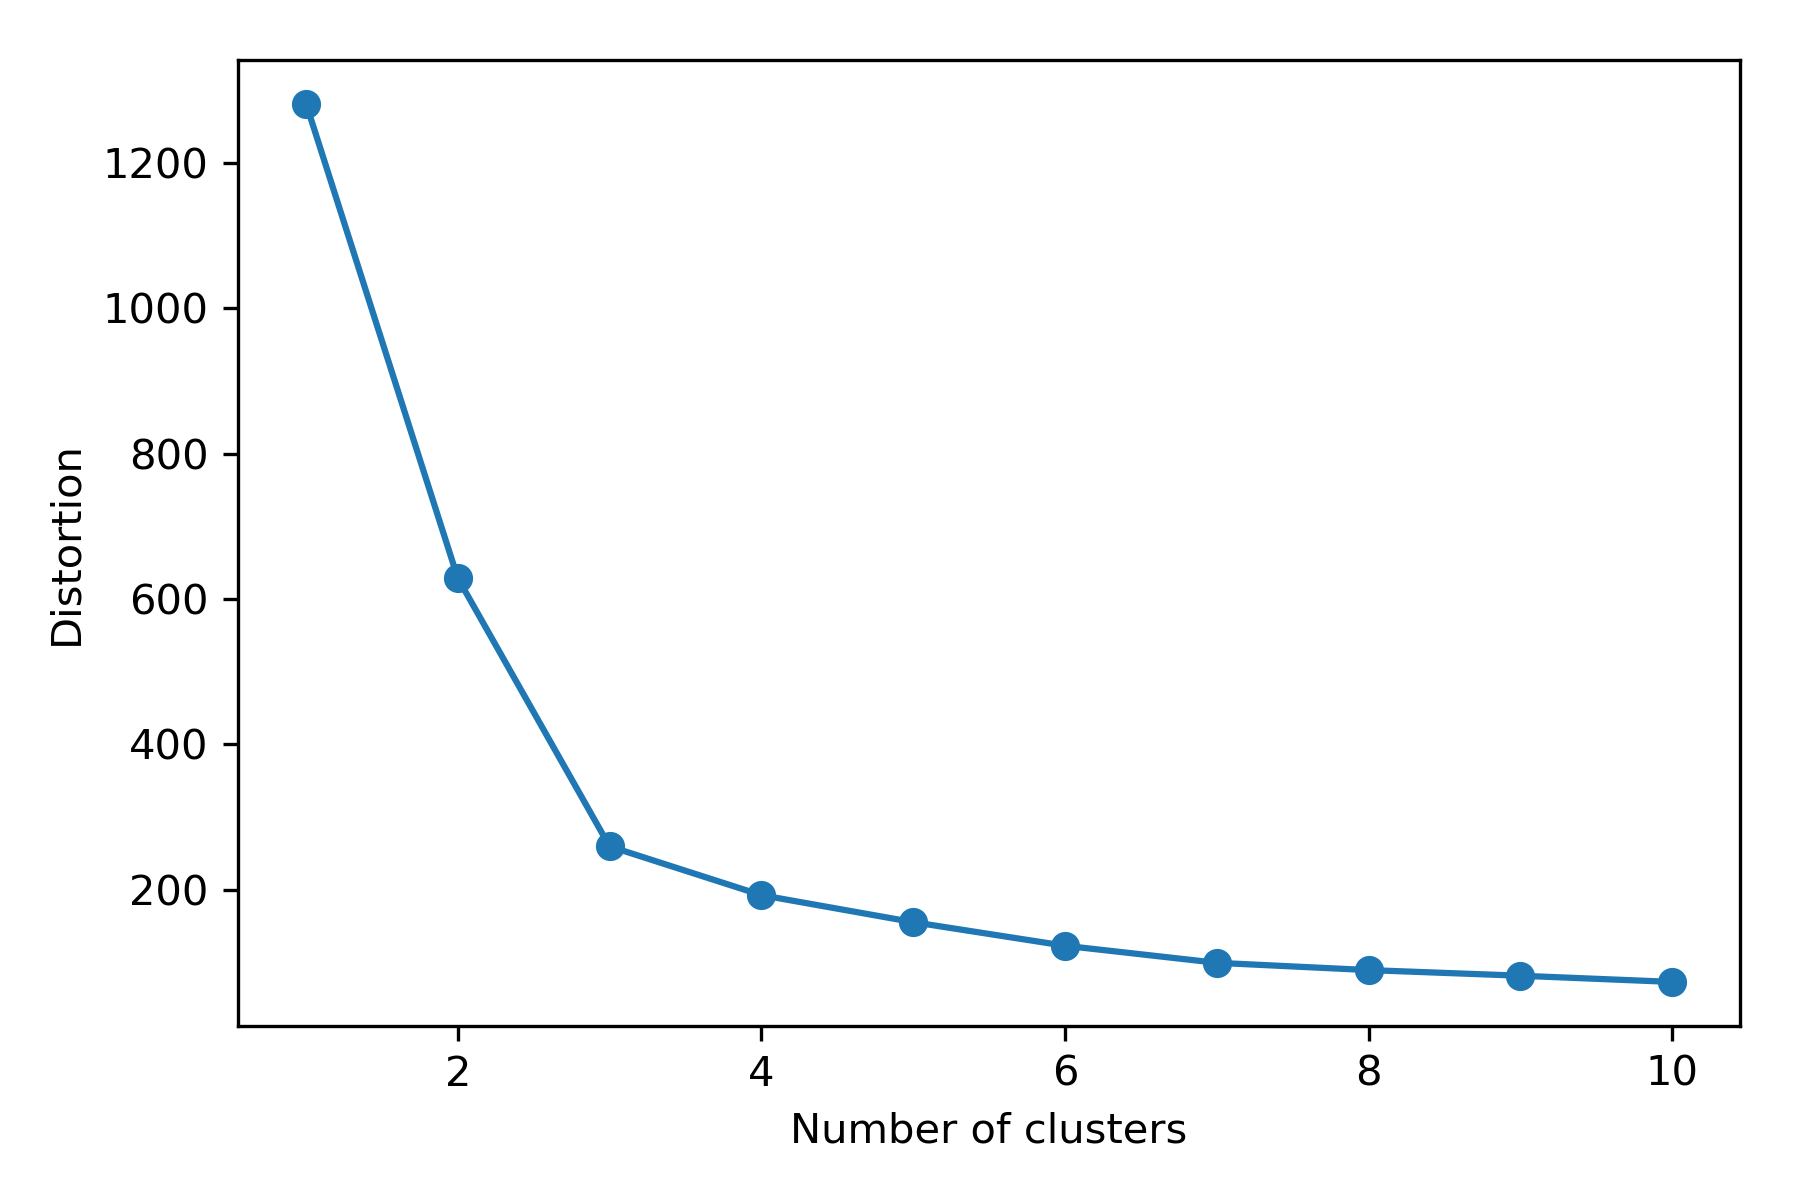

In [36]:
Image(filename=r'elbow.png')